In [1]:
"""

    In this problem we have to use 30 different columns and we have to predict the Stage of Breast Cancer M (Malignant) and B (Bengin)
    This analysis has been done using Basic Machine Learning Algorithm with detailed explanation
    This is good for beginners like as me Lets start.

4.Attribute Information:

1) ID number

2) Diagnosis (M = malignant, B = benign)

-3-32.Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g). concavity (severity of concave portions of the contour)

h). concave points (number of concave portions of the contour)

i). symmetry

j). fractal dimension ("coastline approximation" - 1)

5 here 3- 32 are divided into three parts first is Mean (3-13), Stranded Error(13-23) and Worst(23-32) and each contain 10 parameter (radius, texture,area, perimeter, smoothness,compactness,concavity,concave points,symmetry and fractal dimension)

    Here Mean means the means of the all cells, standard Error of all cell and worst means the worst cell

"""

"Based On -- https://www.kaggle.com/gargmanish/basic-machine-learning-with-cancer"

'Based On -- https://www.kaggle.com/gargmanish/basic-machine-learning-with-cancer'

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model      import LogisticRegression
from sklearn.model_selection   import train_test_split
from sklearn.cross_validation  import KFold
from sklearn.model_selection   import GridSearchCV
from sklearn.ensemble          import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes       import GaussianNB
from sklearn.neighbors         import KNeighborsClassifier
from sklearn.tree              import DecisionTreeClassifier
from sklearn                   import svm
from sklearn                   import metrics
from sklearn                   import linear_model,cross_validation


In [3]:
data = pd.read_csv(r"E:\desktop\Notebooks\andrew ng\Breast Cancer\data.csv",header=0)

In [69]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
data.dropna(axis=1,inplace=True)

In [6]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [7]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [81]:
"The data can be divided into three parts.So ,Lets divide the features according to their category"
data_means= list(data.columns[2:11])
data_se   = list(data.columns[11:20])
data_worst= list(data.columns[21:31])

In [82]:
print(data_means)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean']


In [83]:
print(data_se)

['fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se']


In [84]:
print(data_worst)

['fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst']


In [85]:
data['diagnosis']

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     0
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
539    0
540    0
541    0
542    0
543    0
544    0
545    0
546    0
547    0
548    0
549    0
550    0
551    0
552    0
553    0
554    0
555    0
556    0
557    0
558    0
559    0
560    0
561    0
562    1
563    1
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [86]:
from sklearn import preprocessing

In [87]:
#Y=data['diagnosis']
le=preprocessing.LabelEncoder()
data['diagnosis']=le.fit(data['diagnosis']).transform(data['diagnosis'])


In [88]:
le.classes_

array([0, 1], dtype=int64)

In [89]:
data['diagnosis']

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     0
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
539    0
540    0
541    0
542    0
543    0
544    0
545    0
546    0
547    0
548    0
549    0
550    0
551    0
552    0
553    0
554    0
555    0
556    0
557    0
558    0
559    0
560    0
561    0
562    1
563    1
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [90]:
data.describe() # this will describe the all statistical function of our data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


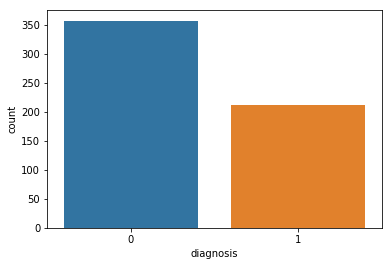

In [91]:
sns.countplot(data['diagnosis'],label="count")

In [92]:
# from this graph we can see that there is a more number of bengin stage of cancer which can be cure

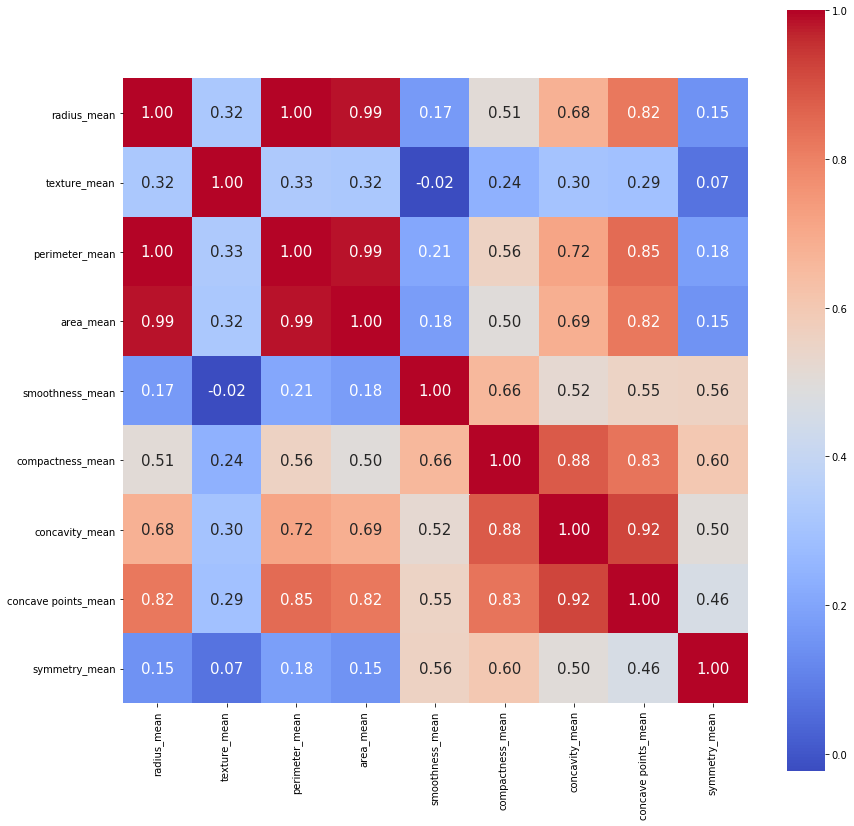

In [93]:
corr = data[data_means].corr()

plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= data_means, yticklabels= data_means,cmap= 'coolwarm',)

In [94]:
"""
Since high correlation between 
compactness_mean and concavity_mean and concave points_mean
area_meana and perimeter_mean and radius_mean

selected parameters are perimeter_mean ,texture_mean ,smoothness_mean ,compactness_mean,symmetry_mean 
"""
prediction_var= ["perimeter_mean","texture_mean" ,"smoothness_mean" ,"compactness_mean" ,"symmetry_mean"]

In [95]:
train,test = train_test_split(data, test_size =0.3, random_state=100)

In [96]:
print(train.shape)
print(test.shape)

(398, 32)
(171, 32)


In [97]:
train_X = train[prediction_var]

In [98]:
train_Y = train.diagnosis

In [99]:
test_X = test[prediction_var]

In [100]:
test_Y = test.diagnosis

In [101]:
model1 = RandomForestClassifier(n_estimators = 100) #basic random forest classifier

In [103]:
model1.fit(train_X,train_Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [104]:
acc1 = metrics.accuracy_score(prediction ,test_Y)
print(acc1)

0.929824561404


In [105]:
prediction = model1.predict(test_X)

In [106]:
#svm next

In [107]:
model2 = svm.SVC()

In [108]:
model2.fit(train_X,train_Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [109]:
prediction2 = model2.predict(test_X)

In [110]:
acc2 = metrics.accuracy_score(prediction2 ,test_Y)

In [111]:
print(acc2)

0.836257309942


In [112]:
"""let's try to improveon this result                                                                                          It's more of generation of intuition while playing along with all the hyperparameters"""

"let's try to improveon this result                                                                                          It's more of generation of intuition while playing along with all the hyperparameters"

In [122]:
prediction_var = data_means # taking all features

In [123]:
train_X = train[prediction_var]
print(train_X)
train_Y = train.diagnosis

test_X  = test[prediction_var]
test_Y  = test.diagnosis

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
18        19.810         22.15          130.00     1260.0          0.09831   
213       17.420         25.56          114.50      948.0          0.10060   
532       13.680         16.33           87.76      575.5          0.09277   
191       12.770         21.41           82.02      507.4          0.08749   
235       14.030         21.25           89.79      603.4          0.09070   
471       12.040         28.14           76.85      449.9          0.08752   
485       12.450         16.41           82.85      476.7          0.09514   
153       11.150         13.08           70.87      381.9          0.09754   
357       13.870         16.21           88.52      593.7          0.08743   
412        9.397         21.68           59.75      268.8          0.07969   
227       15.000         15.51           97.45      684.5          0.08371   
55        11.520         18.75           73.34      409.0       

In [124]:
model1_=RandomForestClassifier(n_estimators=100)

In [125]:
model1_.fit(train_X,train_Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [126]:
prediction_ = model1_.predict(test_X)

In [127]:
acc1_ = metrics.accuracy_score(prediction_ ,test_Y)
print(acc1_)

0.93567251462


In [130]:
"""Not a lot of improvement"""

'Not a lot of improvement'

In [136]:
feat_imp= pd.Series(model1_.feature_importances_,index=prediction_var).sort_values(ascending=False)

In [137]:
print(feat_imp)

concave points_mean    0.283257
perimeter_mean         0.177969
area_mean              0.157699
concavity_mean         0.122888
radius_mean            0.113751
texture_mean           0.050501
compactness_mean       0.044793
smoothness_mean        0.032542
symmetry_mean          0.016599
dtype: float64


In [138]:
model2_ = svm.SVC()
model2_.fit(train_X,train_Y)
prediction2_=model2_.predict(test_X)
metrics.accuracy_score(prediction2_,test_Y)

0.66081871345029242

In [135]:
"""Accuracy of svm decreases very much"""

'Accuracy of svm decreases very much'

In [149]:
#take top 5 into consideration
prediction_var=['concave points_mean','perimeter_mean' ,'concavity_mean', 'radius_mean','area_mean']      

In [150]:
train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis



model3_=RandomForestClassifier(n_estimators=100)
model3_.fit(train_X,train_y)
prediction3_ = model3_.predict(test_X)
metrics.accuracy_score(prediction3_,test_y)



0.91228070175438591

In [151]:
model4_ = svm.SVC()
model4_.fit(train_X,train_y)
prediction4_=model4_.predict(test_X)
metrics.accuracy_score(prediction4_,test_y)

0.7192982456140351

In [153]:
prediction_var = data_worst

train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

model5_ = svm.SVC()
model5_.fit(train_X,train_y)
prediction5_=model5_.predict(test_X)
metrics.accuracy_score(prediction5_,test_y)

0.61988304093567248

In [154]:
model6_=RandomForestClassifier(n_estimators=100)
model6_.fit(train_X,train_y)
prediction6_ = model6_.predict(test_X)
metrics.accuracy_score(prediction6_,test_y)

0.96491228070175439

In [156]:
featimp = pd.Series(model6_.feature_importances_, index=prediction_var).sort_values(ascending=False)
print(featimp)

concave points_worst    0.223443
perimeter_worst         0.201099
area_worst              0.183217
radius_worst            0.182877
concavity_worst         0.062139
compactness_worst       0.041991
texture_worst           0.035291
smoothness_worst        0.033495
symmetry_worst          0.025786
fractal_dimension_se    0.010662
dtype: float64


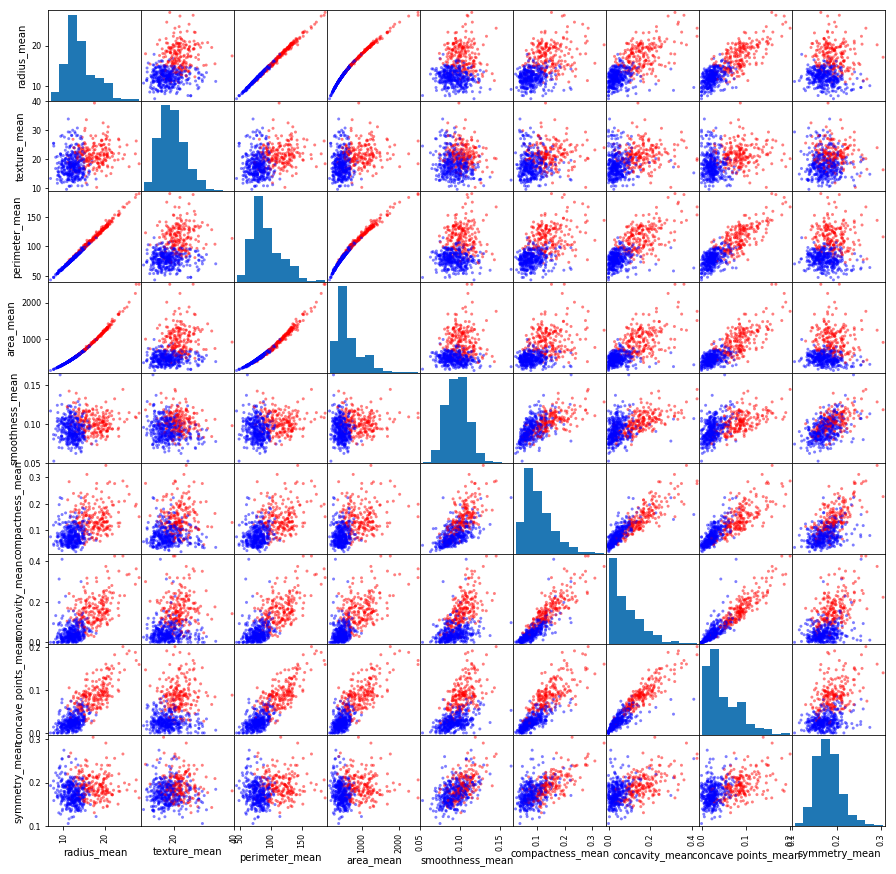

In [159]:
#Let's try to visualize results

color_function = {0: "blue", 1: "red"} # Here Red color will be 1 which means M and blue foo 0 means B
colors = data["diagnosis"].map(lambda x: color_function.get(x))# mapping the color fuction with diagnosis column
pd.plotting.scatter_matrix(data[data_means], c=colors, alpha = 0.5, figsize = (15, 15)); # plotting scatter plot matrix



In [168]:
"""Observation                                                                                                                1. Radius, area and perimeter have a strong linear relationship as expected                                                              2 As graph shows the features like as texture_mean, smoothness_mean, symmetry_mean and fractal_dimension_mean can't be used for classify two category because both categories are mixed there is no separable boundary as such                                                                            So we can remove them from our prediction_var"""

"Observation                                                                                                                1. Radius, area and perimeter have a strong linear relationship as expected                                                              2 As graph shows the features like as texture_mean, smoothness_mean, symmetry_mean and fractal_dimension_mean can't be used for classify two category because both categories are mixed there is no separable boundary as such                                                                            So we can remove them from our prediction_var"

In [169]:
data_means

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean']

In [170]:
predictor_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']

In [190]:
def classification_model(model,data_for_model,param_grid,testpercent):
    x_std = data_for_model
    y_std = data.diagnosis
    test_percentage = testpercent
    x_train, x_test, y_train, y_test =cross_validation.train_test_split(x_std, y_std, test_size = test_percentage, random_state = 243)

    clf=model

    #k_range = list(range(1, 32))
    #print(k_range)
    #param_grid = dict(n_neighbors=k_range)
    print(param_grid)

    grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy')
    grid.fit(x_std, y_std)

    grid.grid_scores_
    for i in range(len(grid.grid_scores_)):
        print(grid.grid_scores_[i].parameters)
        print(grid.grid_scores_[i].cv_validation_scores)
        print(grid.grid_scores_[i].mean_validation_score)

    grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
    print(grid_mean_scores)
    
    
    print(grid.best_score_)
    print(grid.best_params_)
    print(grid.best_estimator_)

    # Set the clf to the best combination of parameters
    clf = grid.best_estimator_

    # Fit the best algorithm to the data.
    clf.fit(x_train,y_train)

    #print(x_test)
    predictions = clf.predict(x_test)
    print('prediction',predictions)
    print('ytest')
    print(y_test)
    acc =metrics.accuracy_score(predictions, y_test)
    print("Accuracy on Best Estimators :" ,acc)
    return(grid_mean_scores)

In [191]:
model=svm.SVC()
param_grid = [
              {'C': [1, 10, 100, 1000], 
               'kernel': ['linear']
              },
              {'C': [1, 10, 100, 1000], 
               'gamma': [0.001, 0.0001], 
               'kernel': ['rbf']
              },
]
grid_mean_scores =classification_model(model,data[predictor_var],param_grid,0.4)
#returns a list of Cross validation mean scores for each parameter inside the dictionary of parameters

#plot_grid(grid_mean_scores,param_grid)

[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}, {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}]


C:\Users\DELL1\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\Users\DELL1\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\Users\DELL1\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\Users\DELL1\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_

{'C': 1, 'kernel': 'linear'}
[ 0.89655172  0.79310345  0.87719298  0.89473684  0.89473684  0.9122807
  0.9122807   0.96428571  0.89285714  0.91071429]
0.894551845343
{'C': 10, 'kernel': 'linear'}
[ 0.94827586  0.79310345  0.89473684  0.92982456  0.89473684  0.9122807
  0.9122807   0.96428571  0.875       0.94642857]
0.906854130053
{'C': 100, 'kernel': 'linear'}
[ 0.94827586  0.81034483  0.87719298  0.92982456  0.9122807   0.92982456
  0.9122807   0.96428571  0.89285714  0.94642857]
0.912126537786
{'C': 1000, 'kernel': 'linear'}
[ 0.94827586  0.81034483  0.87719298  0.92982456  0.9122807   0.9122807
  0.89473684  0.96428571  0.89285714  0.94642857]
0.908611599297
{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
[ 0.86206897  0.81034483  0.84210526  0.87719298  0.87719298  0.89473684
  0.94736842  0.96428571  0.91071429  0.94642857]
0.892794376098
{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
[ 0.86206897  0.82758621  0.84210526  0.87719298  0.87719298  0.89473684
  0.94736842  0.96428571  0.91071

[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}, {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}]
 
[(1, 10, 100, 1000), (1, 10, 100, 1000), (1, 10, 100, 1000)]
 
[0.89455184534270649, 0.90685413005272408, 0.91212653778558872, 0.9086115992970123, 0.89279437609841827, 0.89455184534270649, 0.89279437609841827, 0.89279437609841827, 0.89103690685413006, 0.88752196836555364, 0.88752196836555364, 0.90509666080843587]


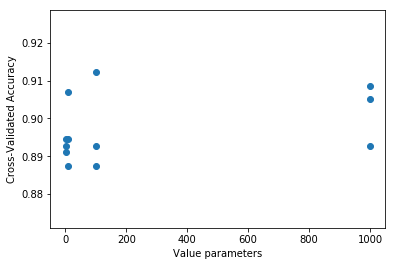

In [216]:
def plot_grid_svm(grid_mean_scores,param_grid):
    C = []
    s_range=[]
    print(param_grid)
    print(" ")
    for i in range(len(param_grid)):
        key = param_grid[i].keys()
        #print(key)
        if("gamma" in key):
            l = len(param_grid[i]['gamma'])
            for j in range(l):
                C.append(tuple(param_grid[i]['C']))
        else:
            C.append(tuple(param_grid[i]['C']))
    print(C)
    print(" ")
    print(grid_mean_scores)
    
    plt.scatter(C, grid_mean_scores)
    plt.xlabel('Value parameters')
    plt.ylabel('Cross-Validated Accuracy')
                 
plot_grid_svm(grid_mean_scores,param_grid)            
            
            
            
    


In [202]:
grid_mean_scores

[0.89455184534270649,
 0.90685413005272408,
 0.91212653778558872,
 0.9086115992970123,
 0.89279437609841827,
 0.89455184534270649,
 0.89279437609841827,
 0.89279437609841827,
 0.89103690685413006,
 0.88752196836555364,
 0.88752196836555364,
 0.90509666080843587]